# Statistical Analysis of SPC Software Selection
### Thesis Topic:  Map out the best BI tool and SPC software for a case company: selection and rationalization process.

### Comprehensive analysis of SPC Software selection process for the case company, encompassing: 
#### 1. Descriptive analysis
#### 2. Correlation analysis
#### 3. Hypothesis testing,
#### 4. Regression analysis.

In [1]:
# Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the Excel file
data = pd.read_excel('SPC software.xlsx')

# The range of rows and columns (for specific extraction of rows and column of excel file)
rows_range = range(0, 8)  
columns_range = data.columns[0:15]  

# the specific cells extraction
df = data.loc[rows_range, columns_range]

df

,Capabilities,WinSPC,Predisys Analytical Suite,Enact,SPC for Excel,DataLyzer Spectrum SPC,IQMS MES,Intuitive ERP,iPASP Cloud SPC,RealTime SPC(Minitab),Synergy SPC,SQCpack,ProFicient,QDM SPC System
0,Efficacy 1,4.0,4.00,3.50,5.00,5.0,2.50,2.50,3,4.60,4.60,4.60,4.60,3.0
1,Efficacy 2,4.0,4.00,3.00,5.00,4.0,3.00,2.00,4,3.00,4.00,3.00,4.00,4.0
2,Efficacy 3,3.0,4.00,3.00,4.00,4.0,3.00,4.00,4,4.00,4.00,3.00,4.00,4.0
3,Efficacy 4,4.0,4.00,5.00,5.00,4.0,3.00,3.00,3,4.00,3.00,3.00,3.00,5.0
4,Efficacy 5,5.0,4.00,3.00,5.00,3.0,3.00,3.00,4,4.00,4.00,5.00,5.00,5.0
5,Efficacy 6,4.0,4.33,3.67,4.33,4.0,2.33,2.33,4,4.33,4.67,4.33,4.67,4.0
6,Efficacy 7,4.6,4.00,4.00,4.80,4.8,4.00,4.05,4,4.40,4.20,4.60,4.70,4.7
7,Total Weight,28.6,28.33,25.17,33.13,28.8,20.83,20.88,26,28.33,28.47,27.53,29.97,29.7


In [3]:
import pandas as pd

# Assuming you have a DataFrame named 'df'
height = df.shape[0]  # Number of rows
width = df.shape[1]   # Number of columns

print("Height (Number of Rows):", height)
print("Width (Number of Columns):", width)


Height (Number of Rows): 8
Width (Number of Columns): 14


# 1. Descriptive statistics

In [4]:
# The range of rows and columns (for specific extraction of rows and column of excel file)

rows_range = range(1, 8)  
columns_range = data.columns[1:14] 

# Extract the specific cells
df = data.loc[rows_range, columns_range]

# specifying the meanings to Efficacy variables
meanings = {
    'Efficacy 1': 'Charts and advanced data analysis criteria',
    'Efficacy 2': 'Quality control (real-time)',
    'Efficacy 3': 'Customer support',
    'Efficacy 4': 'Cost effectiveness',
    'Efficacy 5': 'User Experiences',    
    'Efficacy 6': 'Other important capabilities:Customizability, Attrative Visualization, Specifications',
    'Efficacy 7': 'Public Review includes www.capterra.fi, www.getapp.com',

}

# The index labels with meanings
df = df.rename(index=meanings)

# Convertion of columns to numeric values
df = df.apply(pd.to_numeric, errors='coerce')

# The descriptive statistics for each tool excluding 'Total Weight'
stats = df.iloc[:-1].describe().transpose()

print(round(stats, 2))


                           count  mean   std   min   25%   50%   75%   max
WinSPC                       6.0  4.10  0.68  3.00  4.00  4.00  4.45  5.00
Predisys Analytical Suite    6.0  4.06  0.13  4.00  4.00  4.00  4.00  4.33
Enact                        6.0  3.61  0.80  3.00  3.00  3.34  3.92  5.00
SPC for Excel                6.0  4.69  0.43  4.00  4.45  4.90  5.00  5.00
DataLyzer Spectrum SPC       6.0  3.97  0.57  3.00  4.00  4.00  4.00  4.80
IQMS MES                     6.0  3.06  0.53  2.33  3.00  3.00  3.00  4.00
Intuitive ERP                6.0  3.06  0.84  2.00  2.50  3.00  3.75  4.05
iPASP Cloud SPC              6.0  3.83  0.41  3.00  4.00  4.00  4.00  4.00
RealTime SPC(Minitab)        6.0  3.95  0.50  3.00  4.00  4.00  4.25  4.40
Synergy SPC                  6.0  3.98  0.55  3.00  4.00  4.00  4.15  4.67
SQCpack                      6.0  3.82  0.92  3.00  3.00  3.66  4.53  5.00
ProFicient                   6.0  4.23  0.72  3.00  4.00  4.34  4.69  5.00
QDM SPC System           

### Calculating the mean, median, standard deviation, variance, range, IQR for SPC for Excel

In [5]:
print(df.columns)

Index(['WinSPC', 'Predisys Analytical Suite', 'Enact', 'SPC for Excel',
       'DataLyzer Spectrum SPC', 'IQMS MES', 'Intuitive ERP',
       'iPASP Cloud SPC', 'RealTime SPC(Minitab)', 'Synergy SPC', 'SQCpack',
       'ProFicient', 'QDM SPC System'],
      dtype='object')


In [6]:
# The row corresponding to 'SPC for Excel' from the DataFrame
SPC_for_Excel =  df[df.columns[3]]

In [7]:
mean = round(SPC_for_Excel .mean(), 2)
print("Mean:", mean)

Mean: 8.75


In [8]:
median = SPC_for_Excel .median()
print("Median:", median)

Median: 5.0


In [9]:
std = round(SPC_for_Excel .std(), 2)

print("Standard Deviation:", std)

Standard Deviation: 10.76


In [10]:
variance = round(SPC_for_Excel .var(), 2)

print("Variance:", variance)

Variance: 115.71


In [11]:
data_range = round(max(SPC_for_Excel ) - min(SPC_for_Excel ), 2)
print("Range:", data_range)

Range: 29.13


In [12]:
# first qurtile, 25%
q1 = SPC_for_Excel.quantile(0.25) 

# third qurtile, 75%
q3 = SPC_for_Excel.quantile(0.75)

 # Inter-quartile range
iqr = round((q3 - q1),2)

print("Interquartile Range (IQR):", iqr)

Interquartile Range (IQR): 0.44


## Descriptive Statistics of SPC Software: Box Plot

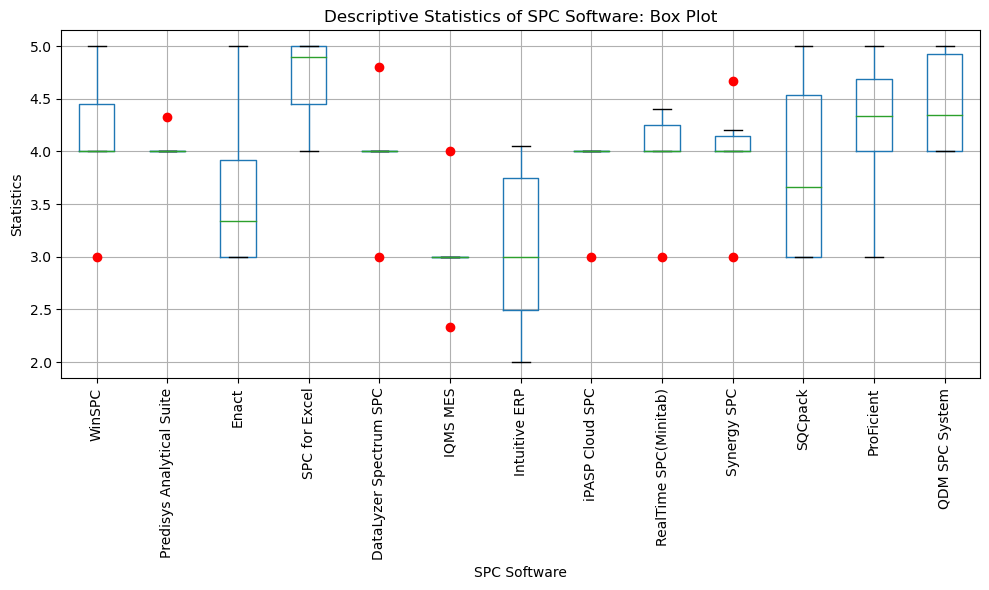

In [13]:
# Setting the figure size
plt.figure(figsize=(10, 6))

# box plots for each column
df.iloc[:-1].boxplot(rot=90, sym='ro')

# The title and labels
plt.title('Descriptive Statistics of SPC Software: Box Plot')
plt.xlabel('SPC Software')
plt.ylabel('Statistics')

# to prevent overlapping labels adjusting labels
plt.tight_layout()

# Show the plot
plt.show()

# Descriptive Statistics of SPC Software: Violinplot 

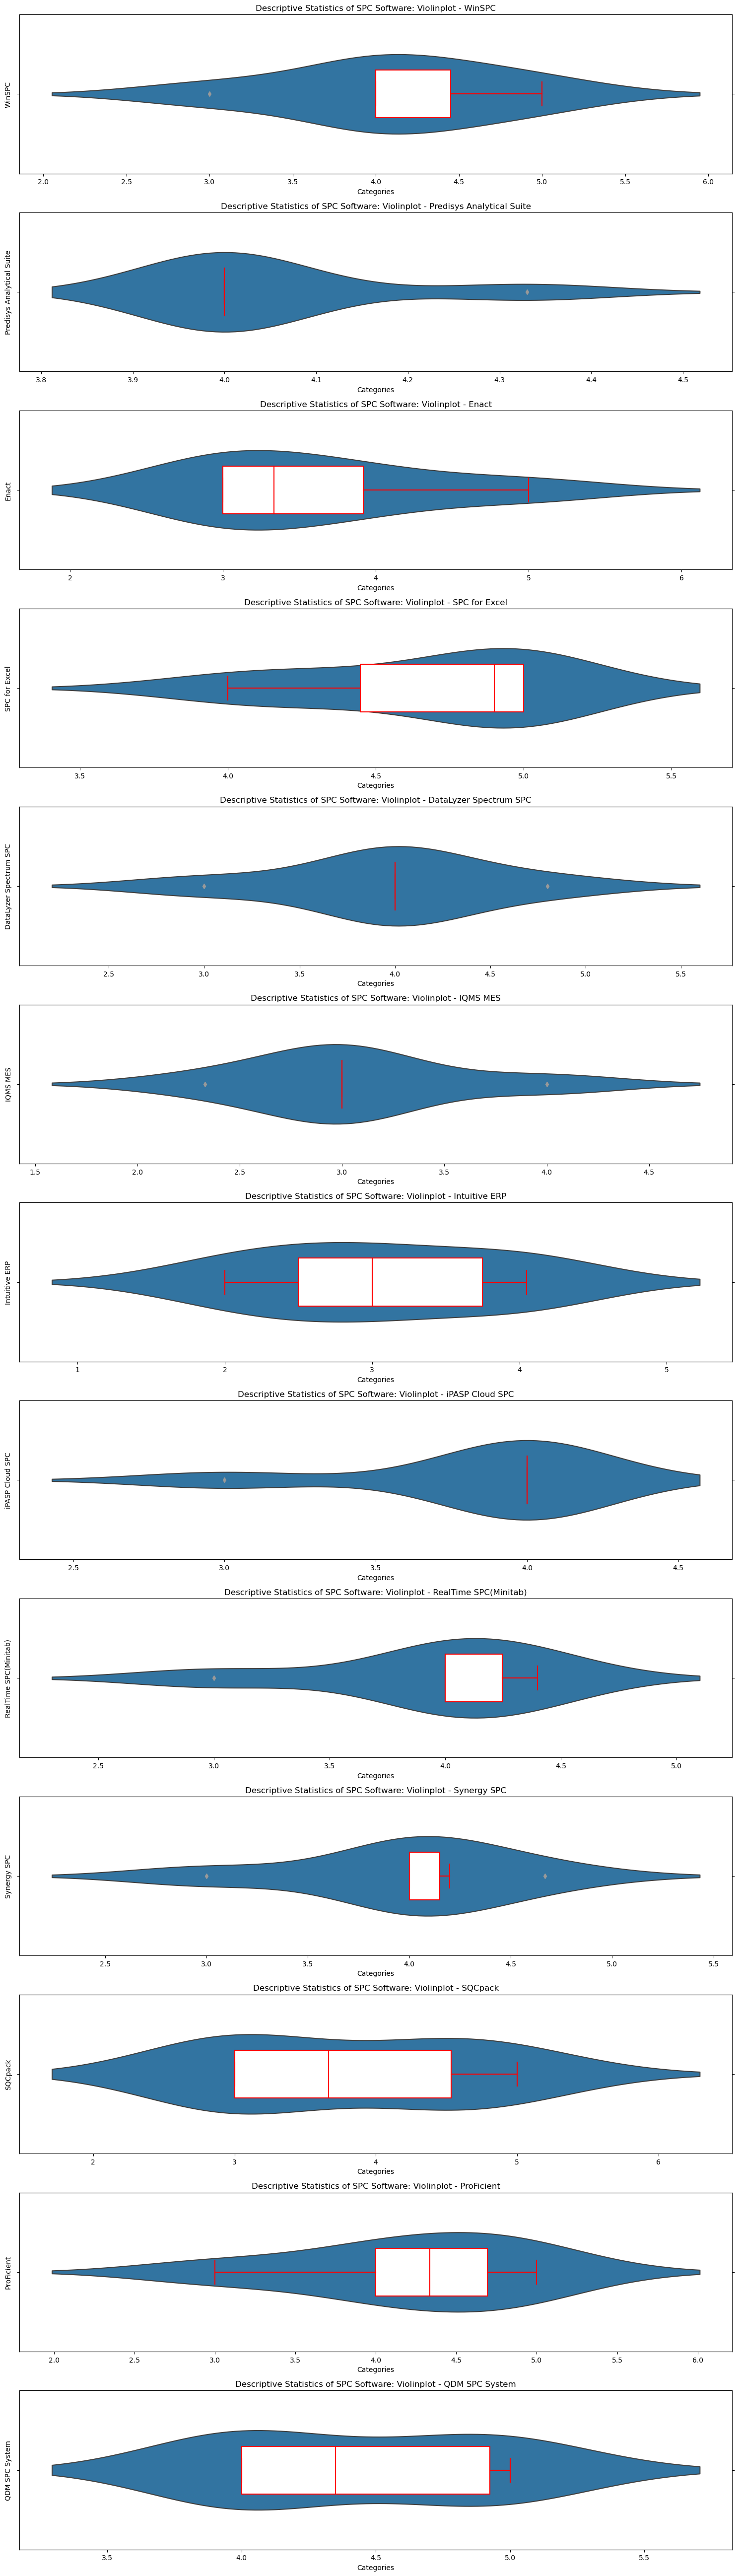

In [14]:
# Setting the figure size
fig, axes = plt.subplots(len(df.iloc[:-1].columns), 1, figsize=(15, 4*len(df.iloc[:-1].columns)))

# Violin plots for each column
for i, column in enumerate(df.iloc[:-1].columns):
    ax = axes[i]
    ax1 = ax.twinx()
    sns.violinplot(x=df.iloc[:-1][column], ax=ax, inner=None, scale='width', width=0.5)
    sns.boxplot(x=df.iloc[:-1][column], ax=ax1, width=0.3, color='white', whiskerprops=dict(color='red'), boxprops=dict(edgecolor='red'),
                medianprops=dict(color='red'), capprops=dict(color='red'))
    ax.set_title(f'Descriptive Statistics of SPC Software: Violinplot - {column}')
    ax.set_xlabel('Categories')
    ax.set_ylabel(column)

    
    for artist in ax1.artists:
        artist.set_alpha(0)

# to prevent overlapping labels adjusting labels
plt.tight_layout()


plt.show()

## Gathering information about the DataFrame

In [15]:
# Retrieving information about the DataFrame using the .info() method
info = df.iloc[:-1].info()

info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 1 to 6
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   WinSPC                     6 non-null      float64
 1   Predisys Analytical Suite  6 non-null      float64
 2   Enact                      6 non-null      float64
 3   SPC for Excel              6 non-null      float64
 4   DataLyzer Spectrum SPC     6 non-null      float64
 5   IQMS MES                   6 non-null      float64
 6   Intuitive ERP              6 non-null      float64
 7   iPASP Cloud SPC            6 non-null      int64  
 8   RealTime SPC(Minitab)      6 non-null      float64
 9   Synergy SPC                6 non-null      float64
 10  SQCpack                    6 non-null      float64
 11  ProFicient                 6 non-null      float64
 12  QDM SPC System             6 non-null      float64
dtypes: float64(12), int64(1)
memory usage: 672.0 bytes


# 2. The correlation analysis

In [16]:
# The correlation matrix
correlation_matrix = df.iloc[:-1].corr()

# Setting display options
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)  # Display in a single line

# Applying background gradient to correlation matrix and round the values
styled_matrix = correlation_matrix.style.background_gradient(cmap='coolwarm').format(precision=2)

# Displaying the styled correlation matrix
display(styled_matrix)


,WinSPC,Predisys Analytical Suite,Enact,SPC for Excel,DataLyzer Spectrum SPC,IQMS MES,Intuitive ERP,iPASP Cloud SPC,RealTime SPC(Minitab),Synergy SPC,SQCpack,ProFicient,QDM SPC System
WinSPC,1.00,-0.07,0.09,0.74,-0.26,0.31,-0.14,0.07,0.16,0.07,0.79,0.52,0.67
Predisys Analytical Suite,-0.07,1.00,0.04,-0.41,0.03,-0.66,-0.43,0.20,0.37,0.62,0.27,0.30,-0.44
Enact,0.09,0.04,1.00,0.29,0.40,0.16,0.11,-0.85,0.39,-0.58,-0.14,-0.58,0.52
SPC for Excel,0.74,-0.41,0.29,1.00,-0.18,0.31,-0.36,-0.36,-0.36,-0.46,0.17,-0.10,0.65
DataLyzer Spectrum SPC,-0.26,0.03,0.40,-0.18,1.00,0.53,0.36,-0.03,0.22,0.10,-0.21,-0.19,-0.24
IQMS MES,0.31,-0.66,0.16,0.31,0.53,1.00,0.66,0.05,0.14,-0.17,0.18,0.09,0.41
Intuitive ERP,-0.14,-0.43,0.11,-0.36,0.36,0.66,1.00,0.04,0.58,-0.10,0.12,0.07,0.27
iPASP Cloud SPC,0.07,0.20,-0.85,-0.36,-0.03,0.05,0.04,1.00,-0.04,0.88,0.44,0.83,-0.53
RealTime SPC(Minitab),0.16,0.37,0.39,-0.36,0.22,0.14,0.58,-0.04,1.00,0.22,0.56,0.31,0.32
Synergy SPC,0.07,0.62,-0.58,-0.46,0.10,-0.17,-0.10,0.88,0.22,1.00,0.52,0.82,-0.58


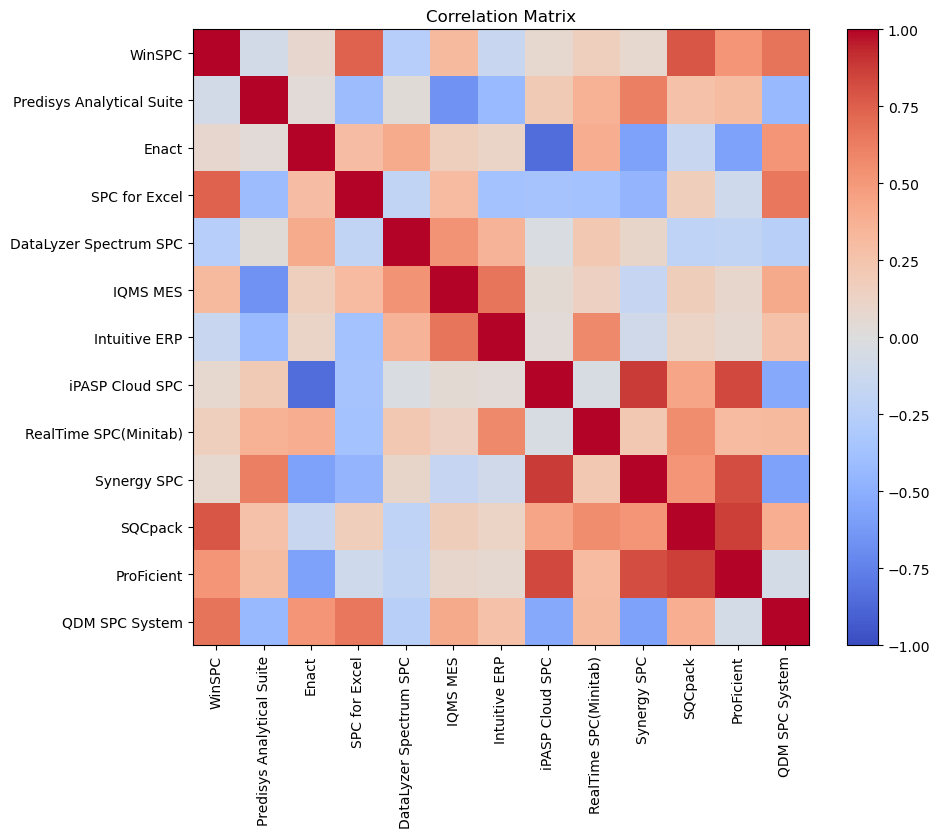

In [17]:
# Visualizing the correlation matrix

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')

plt.savefig('correlation_matrix.jpg', format='jpg')
plt.show()

# 3. Hypothesis testing

In [18]:
import itertools
import scipy.stats as stats

# Creating a list of all possible tool pairs
tool_pairs = list(itertools.combinations(df.iloc[:-1].columns, 2))

# The significance level
alpha = 0.05

# Conducting hypothesis test for each pair of tools
for pair in tool_pairs:
    tool1 = pair[0]
    tool2 = pair[1]
    ratings1 = df.iloc[:-1][tool1]
    ratings2 = df.iloc[:-1][tool2]
    corr_coeff, p_value = stats.pearsonr(ratings1, ratings2)
    
    # Comparing the p-value with the significance level
    if p_value < alpha:
        print(f" Null hypothesis rejected. There is a significant correlation between {tool1} and {tool2}.")
    else:
        print(f" Null hypothesis accepted. There is no significant correlation between {tool1} and {tool2}.")


 Null hypothesis accepted. There is no significant correlation between WinSPC and Predisys Analytical Suite.
 Null hypothesis accepted. There is no significant correlation between WinSPC and Enact.
 Null hypothesis accepted. There is no significant correlation between WinSPC and SPC for Excel.
 Null hypothesis accepted. There is no significant correlation between WinSPC and DataLyzer Spectrum SPC.
 Null hypothesis accepted. There is no significant correlation between WinSPC and IQMS MES.
 Null hypothesis accepted. There is no significant correlation between WinSPC and Intuitive ERP.
 Null hypothesis accepted. There is no significant correlation between WinSPC and iPASP Cloud SPC.
 Null hypothesis accepted. There is no significant correlation between WinSPC and RealTime SPC(Minitab).
 Null hypothesis accepted. There is no significant correlation between WinSPC and Synergy SPC.
 Null hypothesis accepted. There is no significant correlation between WinSPC and SQCpack.
 Null hypothesis acc

In [19]:
# Finding the tools where only there is a significant correlation between between pairs of tools.

# Conducting hypothesis test for each pair of tools
for pair in tool_pairs:
    tool1 = pair[0]
    tool2 = pair[1]
    ratings1 = df.iloc[:-1][tool1]
    ratings2 = df.iloc[:-1][tool2]
    corr_coeff, p_value = stats.pearsonr(ratings1, ratings2)
    
    # Compare the p-value with the significance level
    if p_value < alpha:
        print(f" Null hypothesis rejected. There is a significant correlation between {tool1} and {tool2}.")

 Null hypothesis rejected. There is a significant correlation between Enact and iPASP Cloud SPC.
 Null hypothesis rejected. There is a significant correlation between iPASP Cloud SPC and Synergy SPC.
 Null hypothesis rejected. There is a significant correlation between iPASP Cloud SPC and ProFicient.
 Null hypothesis rejected. There is a significant correlation between Synergy SPC and ProFicient.
 Null hypothesis rejected. There is a significant correlation between SQCpack and ProFicient.


# 4. Regression analysis

## Data Preparation and Linear Regression Training

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np

# Select the predictors (tools) from the DataFrame
predictors = df.iloc[1:, 1:5] 

# Select the target (efficacy scores) for all tools
target = df.iloc[1:, 5:] 

# Train the linear regression model
regressor = LinearRegression()
regressor.fit(predictors, target)

LinearRegression()

## Ridge Regression Training and Efficacy Score Prediction for a New Tool

In [21]:
from sklearn.linear_model import Ridge

# Split the data for ridge regression
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

# Train the ridge regression model
regressor_ridge = Ridge(alpha=1.0)  # You can adjust the alpha parameter to control the amount of regularization
regressor_ridge.fit(X_train, y_train)

# Example data for a new tool (scaled between 0 and 5)
new_tool = [[4.5, 2.5, 4.5, 3.8]]

# Predict the efficacy scores for the new tool
new_tool_pred = regressor_ridge.predict(new_tool)

# The predicted efficacy scores for the new tool (Software X)
predicted_scores = new_tool_pred[0][:7]

print("Predicted Efficacy Scores for Software X:")
print()
print("           Software X")
for i, efficacy_score in enumerate(predicted_scores):
    print(f"Efficacy {i+1}:   {efficacy_score:.2f}")

Predicted Efficacy Scores for Software X:

           Software X
Efficacy 1:   2.80
Efficacy 2:   2.80
Efficacy 3:   3.89
Efficacy 4:   4.06
Efficacy 5:   4.17
Efficacy 6:   4.56
Efficacy 7:   4.69


E:\Jupyter notebook\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


##  Visualization of Predicted Efficacy Scores for Software X.

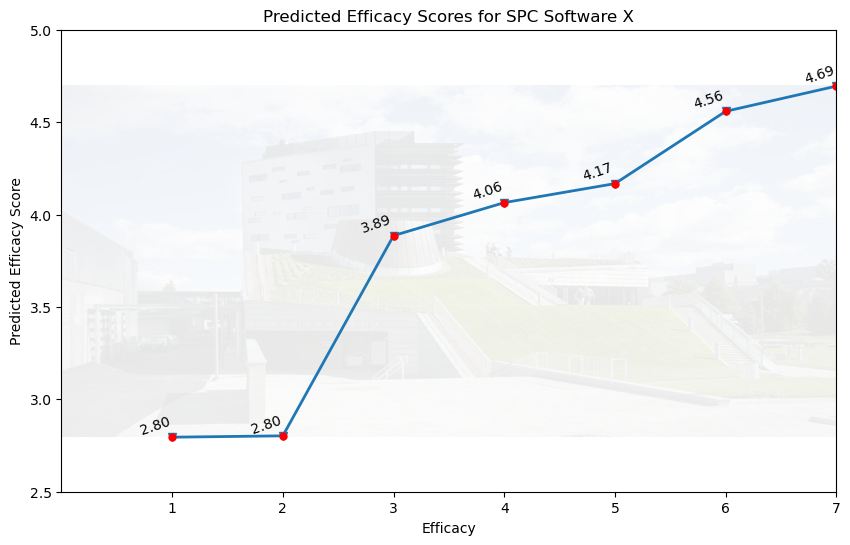

In [22]:
import matplotlib.image as mpimg

# Creating line chart
fig, ax = plt.subplots(figsize=(10, 6))

# Setting background image
watermark_img = mpimg.imread('kampusareenan-etusivu-www_jalonen.jpg')
ax.imshow(watermark_img, extent=[0, 7, min(predicted_scores), max(predicted_scores)], aspect='auto', alpha=0.1)

# Plotting predicted scores
ax.plot(range(1, len(predicted_scores) + 1), predicted_scores, 'v-', linewidth=2)
ax.plot(range(1, len(predicted_scores) + 1), predicted_scores, 'r.', markersize=10)

# Setting y-axis limits
ax.set_ylim(2.5, 5)

# Adding score values as text with slight adjustment
for i, score in enumerate(predicted_scores):
    ax.text(i + 1, score, f'{score:.2f}', ha='right', rotation=19, va='bottom')

ax.set_xlabel('Efficacy')
ax.set_ylabel('Predicted Efficacy Score')
ax.set_title('Predicted Efficacy Scores for SPC Software X')
ax.set_xticks(range(1, len(predicted_scores)))
ax.set_xticks(range(1, 8))  # Adjusted to start from 1

plt.show()

## Model Evaluation

In [23]:
# Evaluate the linear regression model
train_mse_lr = mean_squared_error(y_train, regressor.predict(X_train))
test_mse_lr = mean_squared_error(y_test, regressor.predict(X_test))

# Evaluate the Ridge regression model
train_mse_ridge = mean_squared_error(y_train, regressor.predict(X_train))
test_mse_ridge = mean_squared_error(y_test, regressor.predict(X_test))

# Printing result
print("Linear Regression (Training Set) MSE:", round(train_mse_lr, 2))
print("Linear Regression (Testing Set) MSE:", round(test_mse_lr, 2))
print("Ridge Regression (Training Set) MSE:", round(train_mse_ridge, 2))
print("Ridge Regression (Testing Set) MSE:", round(test_mse_ridge, 2))

Linear Regression (Training Set) MSE: 0.05
Linear Regression (Testing Set) MSE: 0.11
Ridge Regression (Training Set) MSE: 0.05
Ridge Regression (Testing Set) MSE: 0.11


#### The evaluation of the linear regression and ridge regression models on the training and testing sets reveals promising results. Both models exhibit relatively low mean squared error (MSE) values, with 0.05 for the training set and 0.11 for the testing set. The similarity in MSE values suggests that both models perform comparably well in predicting the efficacy scores.

#### Although the low MSE values indicate good performance, it is crucial to conduct further evaluation and validation to ensure the reliability and generalization capabilities of the models. However, due to time constraints and the scope of my thesis, I am concluding the analysis here.